**Trinidad, Cyla Dendeyl M.**

**BSCS 3A**

**Assessment Task 7: Netflix Userbase Analysis**

**Objective**:Leverage linear regression to predict Monthly Revenue and logistic regression to classify customers based on a positive or negative feedback proxy, using the Netflix Userbase dataset. This task will encompass data preprocessing, exploratory data analysis (EDA), model building, evaluation, and visualization.

**Dataset**:
"Netflix Userbase.csv", containing user demographics, subscription details, and other relevant information.


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report

# **Part 1: Data Preprocessing**

**Load the Dataset**: Import the dataset using Pandas and display its structure.


In [ ]:
data = pd.read_csv('/content/Netflix_Userbase.csv')

data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


**Missing Values**: Identify and manage any missing values appropriately.


In [ ]:
data.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

**Encode Categorical Variables**: Transform categorical variables into numerical representations suitable for regression analysis.

In [ ]:
df_dummies = pd.get_dummies(data, columns=['Subscription Type', 'Device','Gender','Plan Duration','Country'])

**Feature Selection**: Decide which features to include in the regression models. Explain your choice.

<ipython-input-26-355e3934240c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


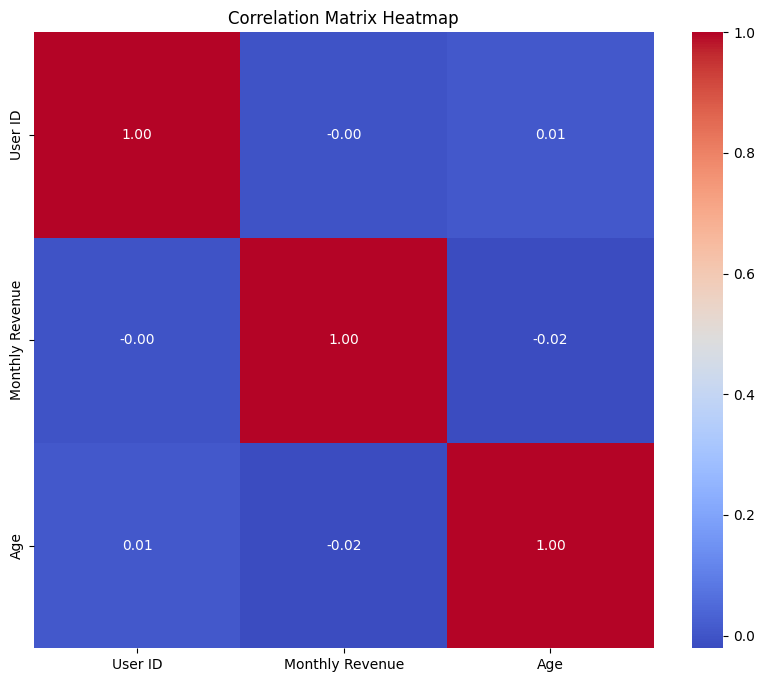

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Part 2: Exploratory Data Analysis (EDA)**

**Descriptive Statistics**: Provide a summary of the data using the .describe() method.

In [ ]:
df_dummies.describe()

,User ID,Monthly Revenue,Age,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet,...,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600,0.399600,0.29320,0.307200,0.254400,0.244000,0.248400,0.253200,...,0.073200,0.073200,0.126800,0.073200,0.073200,0.073200,0.073200,0.180400,0.073200,0.180400
std,721.83216,1.686851,7.171778,0.489914,0.45532,0.461425,0.435611,0.429579,0.432171,0.434932,...,0.260517,0.260517,0.332815,0.260517,0.260517,0.260517,0.260517,0.384597,0.260517,0.384597
min,1.00000,10.000000,26.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,625.75000,11.000000,32.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1250.50000,12.000000,39.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1875.25000,14.000000,45.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2500.00000,15.000000,51.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Visualizations**: Create visualizations (e.g., distribution of Monthly Revenue, user demographics)
to understand the data better.

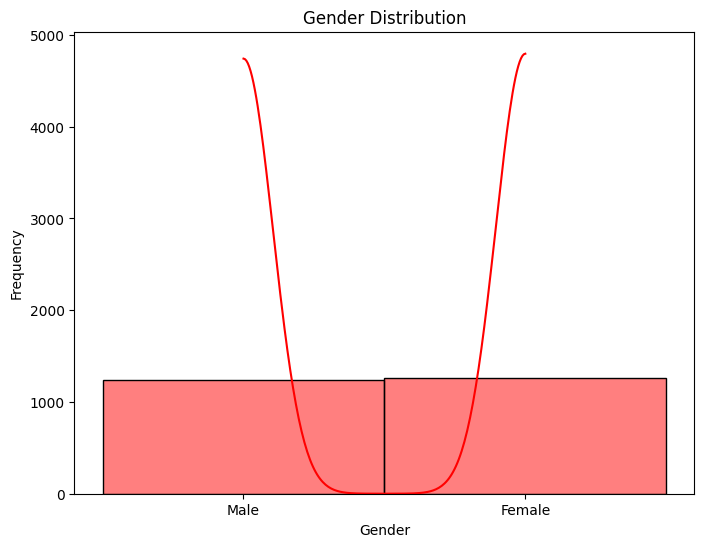

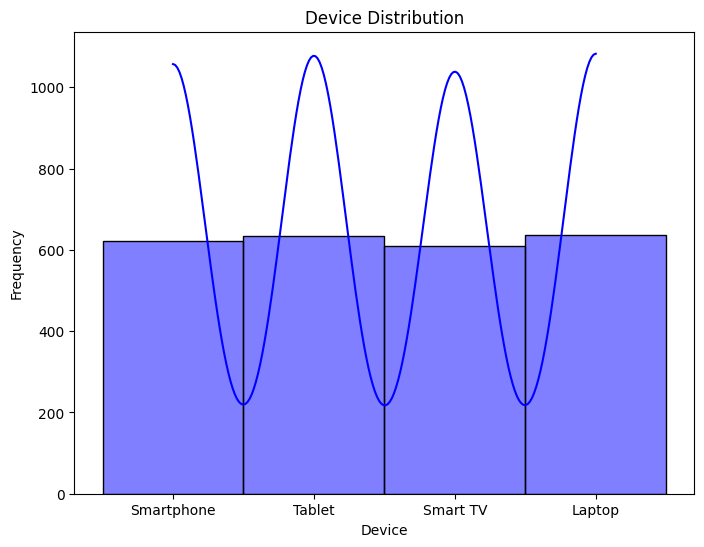

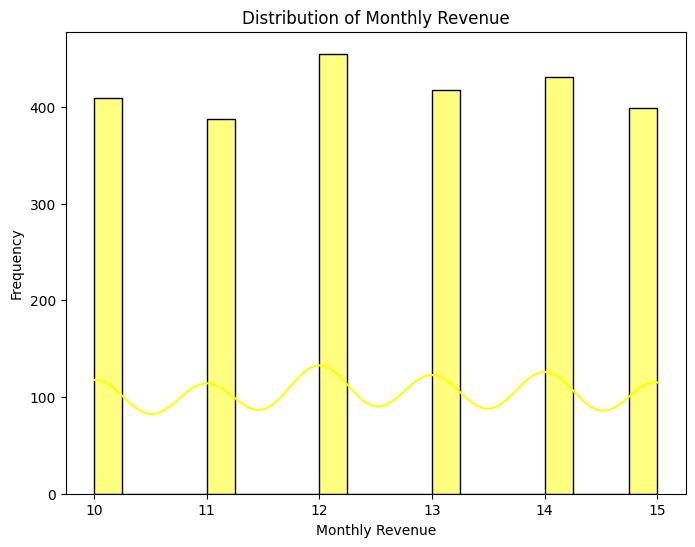

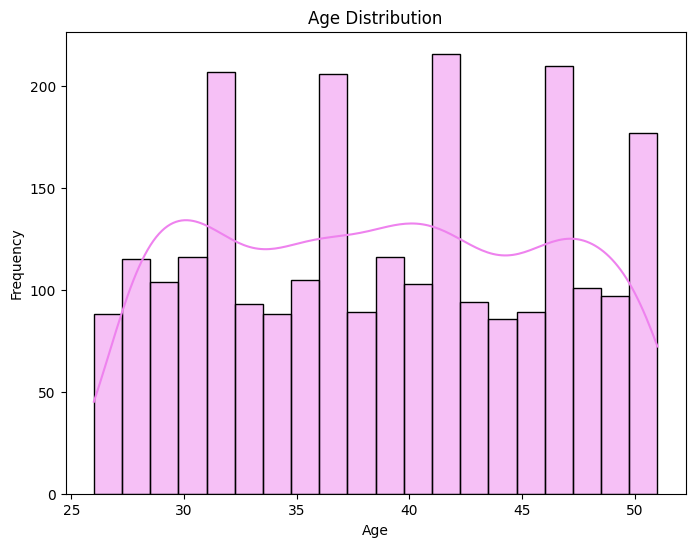

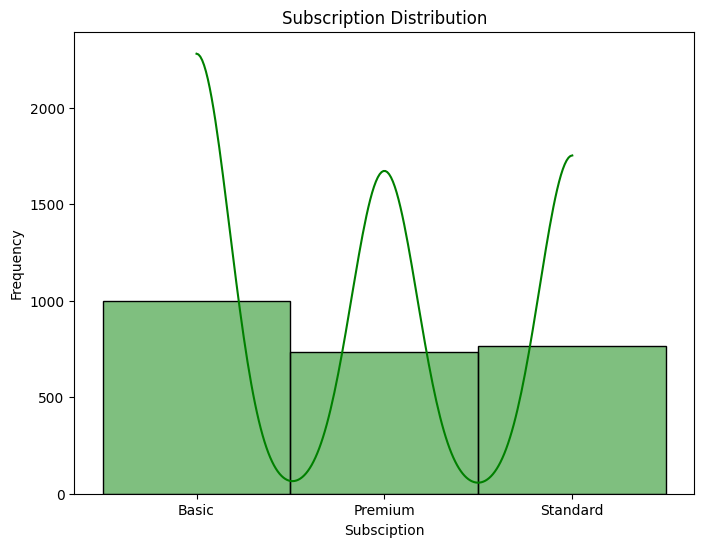

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Gender'], bins=20, kde=True, color='red')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['Device'], bins=20, kde=True, color='blue')
plt.title('Device Distribution')
plt.xlabel('Device')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['Monthly Revenue'], bins=20, kde=True, color='yellow')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='violet')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['Subscription Type'], bins=20, kde=True, color='green')
plt.title('Subscription Distribution')
plt.xlabel('Subsciption')
plt.ylabel('Frequency')
plt.show()



# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

**Build the Model**: Develop a linear regression model to predict the Monthly Revenue based on selected features.

In [ ]:
X = df_dummies.drop(['User ID','Monthly Revenue','Join Date','Last Payment Date'],axis=1)  # Features
Y = df_dummies['Monthly Revenue']   # Target variable

data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model_linear = LinearRegression()
model_linear.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model_linear.predict(X_test)

**Model Evaluation**: Evaluate the model using R-squared, RMSE, or other relevant metrics.

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 2.8189145806989555
Root Mean Squared Error: 1.6789623523768946
R-squared: -0.02054865137919637


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

**Model Building**: Assuming a binary feedback variable (positive/negative), construct a logistic regression model to predict feedback based on user demographics and subscription details.

**Evaluation**: Use accuracy, precision, recall, F1-score, and the confusion matrix for model
assessment.



In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred = model_logistic.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test,Y_pred)
conf_matrix = confusion_matrix(Y_test,Y_pred)
class_report = classification_report(Y_test,Y_pred)

print(f'Accuracy          :   {accuracy}')
print(f'Confusion Matrix  :   {conf_matrix}')
print(f'Class Report      :\n   {class_report}')

Accuracy          :   0.186
Confusion Matrix  :   [[11 10 25 14  9 16]
 [11  7 24  8 18 11]
 [18  5 30  9 14 17]
 [17  7 27 11 14 12]
 [ 9 11 26  9 19 11]
 [ 6  9 22  6 12 15]]
Class Report      :
                 precision    recall  f1-score   support

          10       0.15      0.13      0.14        85
          11       0.14      0.09      0.11        79
          12       0.19      0.32      0.24        93
          13       0.19      0.12      0.15        88
          14       0.22      0.22      0.22        85
          15       0.18      0.21      0.20        70

    accuracy                           0.19       500
   macro avg       0.18      0.18      0.18       500
weighted avg       0.18      0.19      0.18       500

